<a href="https://colab.research.google.com/github/tornadiego/Basics-of-ML/blob/main/Carseats%20Sales%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import sklearn.metrics as sk

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Addition of these consoles to add files in colab storage
from google.colab import files
import io
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['dataset-11424.csv']))

Saving dataset-11424.csv to dataset-11424 (1).csv


In [ ]:
prodata=data
prodata.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
prodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
prodata.describe()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
prodata['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(<Figure size 540x360 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f802c6e4a50>)

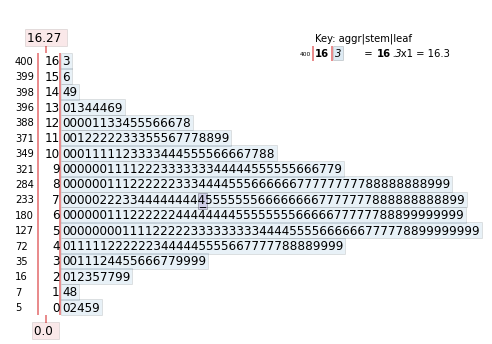

In [ ]:
!pip install stemgraphic
import stemgraphic
stemgraphic.stem_graphic(prodata['Sales'],
scale=1)

(<Figure size 540x378 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f802c6c7910>)

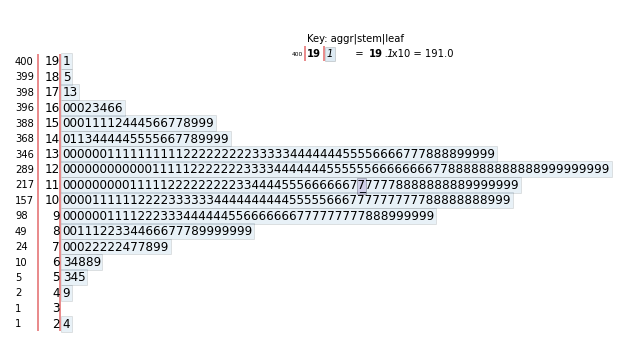

In [ ]:
stemgraphic.stem_graphic(prodata['Price'],
scale=10)


(<Figure size 540x432 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f802af9c610>)

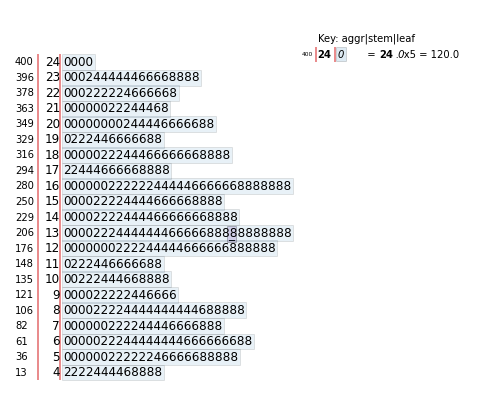

In [ ]:
stemgraphic.stem_graphic(prodata['Income'],
scale=5)


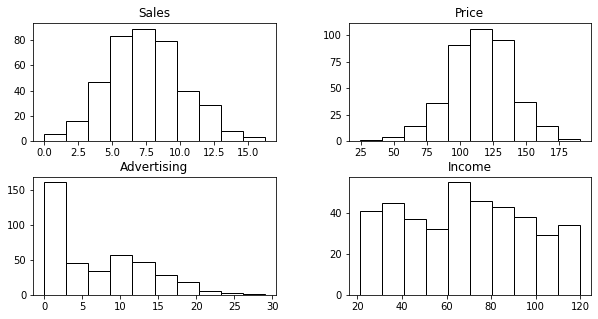

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,
figsize =(10,5))
prodata.hist(column = 'Sales', ax = axes[0,0],
color = 'white', edgecolor = 'black', grid =
False)
prodata.hist(column = 'Price', ax = axes[0,1],
color = 'white', edgecolor = 'black', grid =
False)
prodata.hist(column = 'Advertising', ax =
axes[1,0], color = 'white', edgecolor = 'black',
grid = False)
prodata.hist(column = 'Income', ax = axes[1,1],
color = 'white', edgecolor = 'black', grid =
False)
plt.show()


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2536: RuntimeWarning:

invalid value encountered in subtract



Text(0.5, 1.0, 'Normal Q-Q plot of log(Price)')

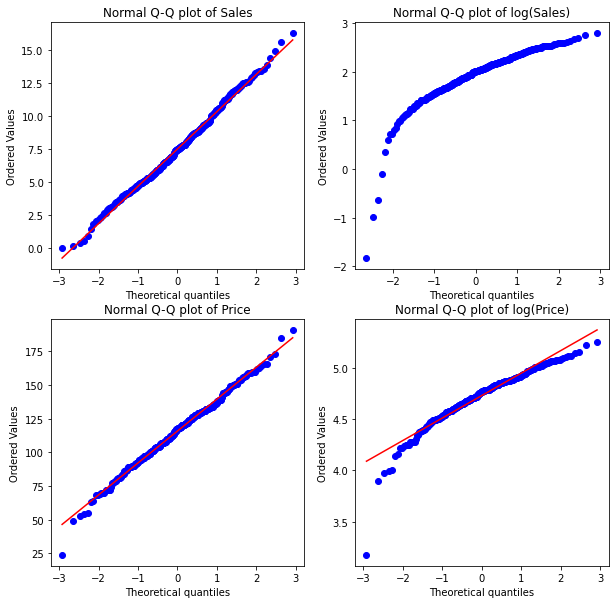

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
stats.probplot(prodata['Sales'], dist="norm",
plot=plt, fit = True)
plt.title('Normal Q-Q plot of Sales')
plt.subplot(2,2,2)
stats.probplot(np.log(prodata['Sales']),
dist="norm", plot=plt, fit = True)
plt.title('Normal Q-Q plot of log(Sales)')
plt.subplot(2,2,3)
stats.probplot(prodata['Price'], dist="norm",
plot=plt, fit = True)
plt.title('Normal Q-Q plot of Price')
plt.subplot(2,2,4)
stats.probplot(np.log(prodata['Price']),
dist="norm", plot=plt, fit = True)
plt.title('Normal Q-Q plot of log(Price)')


In [ ]:
x = prodata['Sales']
np.mean(x)
t,p = stats.ttest_1samp(x,7)
print('t-Statistic = %.4f, p-value = %.4f' % (t,p))


t-Statistic = 3.5149, p-value = 0.0005


In [ ]:
(ll,ul) = stats.t.interval(alpha=0.95,
df=len(x)-1, loc=np.mean(x), scale=stats.sem(x))
print("CI for Sales = (%.4f,%.4f)" % (ll,ul))


CI for Sales = (7.2187,7.7739)


In [ ]:
y = prodata['Price']
np.mean(y)


115.795

In [ ]:
t,p = stats.ttest_1samp(y,115)
print('t-Statistic = %.4f, p-value = %.4f' % (t,p))


t-Statistic = 0.6715, p-value = 0.5023


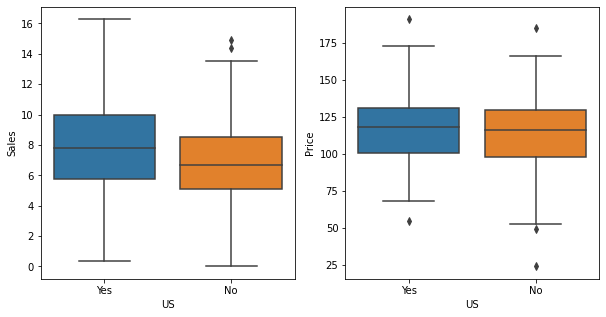

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.boxplot(x = prodata['US'],y =
prodata['Sales'])
plt.subplot(1,2,2)
sns.boxplot(x = prodata['US'],y =
prodata['Price'])
plt.show()

In [ ]:
proUSno = prodata[prodata['US'] == 'No']
#storing data where US column is No
proUSyes = prodata[prodata['US'] != 'No']
#storing data where US column is Yes

t,p = stats.ttest_ind(proUSno['Sales'],proUSyes['Sales'], equal_var = False)
print("t-statistic for independent t-test on Sales = %.4f and p-value = %.4f" % (t,p))


t-statistic for independent t-test on Sales = -3.6956 and p-value = 0.0003


In [ ]:
t,p = stats.ttest_ind(proUSno['Price'],proUSyes['Price'], equal_var = False)
print("t-statistic for independent t-test on Price = %.4f and p-value = %.4f" % (t,p))

t-statistic for independent t-test on Price = -1.1164 and p-value = 0.2653


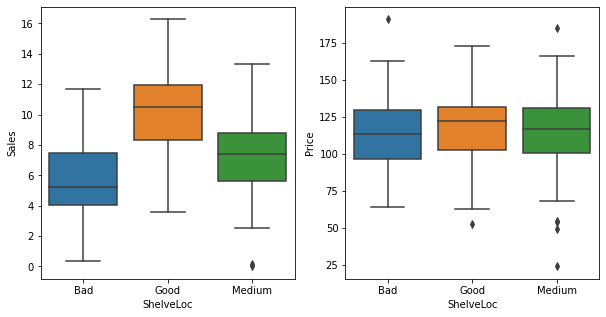

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.boxplot(x = prodata['ShelveLoc'],y =
prodata['Sales'])
plt.subplot(1,2,2)
sns.boxplot(x = prodata['ShelveLoc'],y =
prodata['Price'])
plt.show()

In [ ]:
F,p = stats.f_oneway(
prodata['Sales'][prodata['ShelveLoc']=='Bad'],
prodata['Sales'][prodata['ShelveLoc']=='Good'],
prodata['Sales'][prodata['ShelveLoc']=='Medium']
)
print('F-Statistic = %.4f, p-value = %.4f' % (F,p))

F-Statistic = 92.2299, p-value = 0.0000


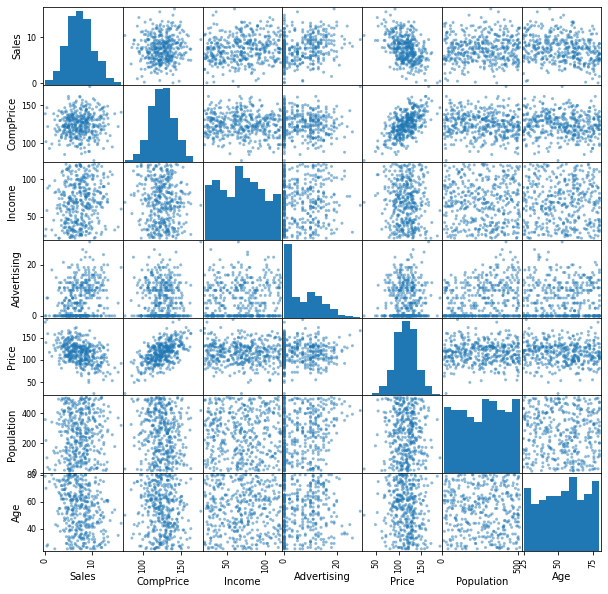

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(prodata[["Sales","CompPrice","Income","Advertising","Price","Population","Age"]],
figsize=(10,10))
plt.show()

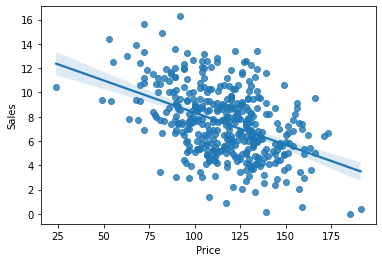

In [ ]:
sns.regplot(y='Sales', x='Price', data =prodata)
plt.show()


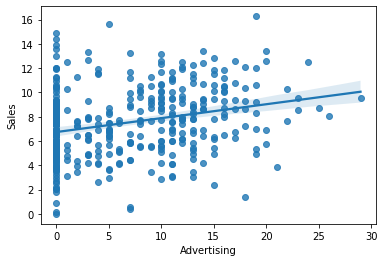

In [ ]:
sns.regplot(y='Sales', x='Advertising', data =prodata)
plt.show()


In [ ]:
print(prodata[['Sales','Price']].corr().round(5))


         Sales    Price
Sales  1.00000 -0.44495
Price -0.44495  1.00000


In [ ]:
c,p = stats.pearsonr(prodata['Sales'],prodata['Price'])
print('p-value = %f' % p)

p-value = 0.000000


In [ ]:
c,p = stats.pearsonr(prodata['Sales'], prodata['Advertising'])
print('correlation coefficient between Sales and Advertising = %f \n p-value = %f' % (c,p))


correlation coefficient between Sales and Advertising = 0.269507 
 p-value = 0.000000


In [ ]:
X = prodata['Price']
Y = prodata['Sales']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           7.62e-21
Time:                        16:42:08   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



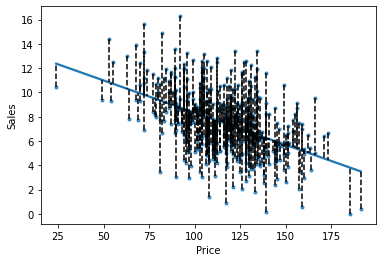

In [ ]:
fig1,ax1 = plt.subplots()
sns.regplot('Price','Sales', data = prodata, ax = ax1, ci = False, marker = '.')
ax1.plot([prodata['Price'],prodata['Price']],[prodata['Sales'],model.predict()], linestyle='--',color = 'black')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



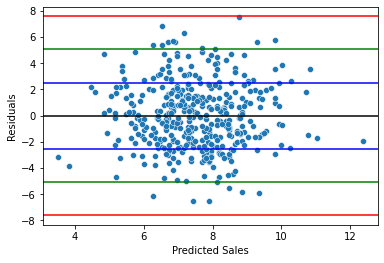

In [ ]:
Y_pred = model.predict(X)
residuals = Y - Y_pred
sd_red=np.std(residuals)
a=[-3,-2,-1,0,1,2,3]
b=['r','g','b','k','b','g','r']
sns.scatterplot(Y_pred, residuals)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
for i,j in zip(a,b):
  plt.axhline(i*sd_red,color=j)


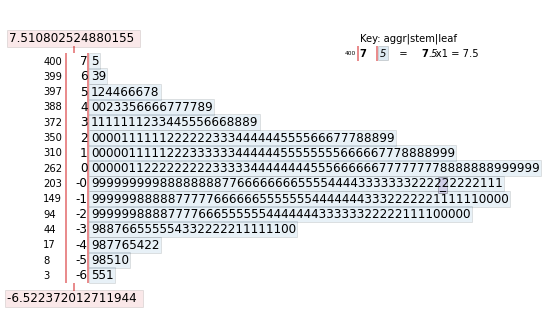

In [ ]:
stemgraphic.stem_graphic(residuals, scale=1)
plt.show()

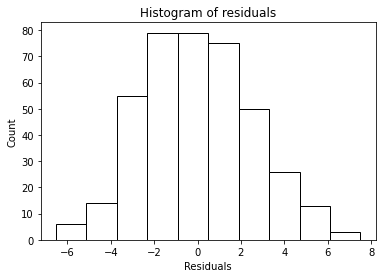

In [ ]:
plt.hist(residuals, color = 'white', edgecolor ='black') #by default bin is set to 10
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of residuals')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



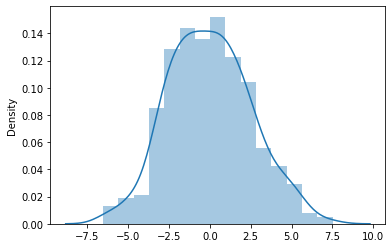

In [ ]:
sns.distplot(residuals)


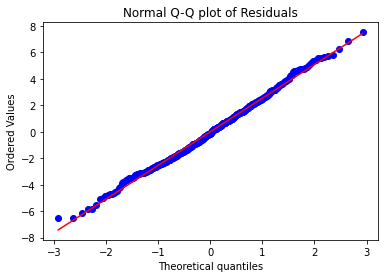

In [ ]:
stats.probplot(residuals, dist="norm", plot=plt,fit = True)
plt.title('Normal Q-Q plot of Residuals')
plt.show()


In [ ]:
rmse = sk.mean_squared_error(Y, Y_pred, squared= False)
print('RMSE' + ' = ' + str(rmse.round(5)))


RMSE = 2.52599


In [ ]:
r2 = sk.r2_score(Y, Y_pred)
print('R2' + ' = ' + str(r2.round(5)))

R2 = 0.19798


In [ ]:
mean_p = np.mean(X['Price'])
print(mean_p)


115.795


In [ ]:
mp = model.params
print(mp)

const    13.641915
Price    -0.053073
dtype: float64


In [ ]:
predsales1 = mp['const'] + mean_p*mp['Price']
print(predsales1.round(5))

7.49633


In [ ]:
p = [1, 115.795]
predsales2 = model.predict(p)
print(predsales2.round(5))

[7.49633]


In [ ]:
result = model.get_prediction().summary_frame()
result.head()


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,7.273153,0.128603,7.020328,7.525978,2.288331,12.257975
1,9.236855,0.216487,8.811255,9.662455,4.240289,14.233420
2,9.396074,0.229708,8.944481,9.847667,4.397227,14.394920
3,8.493832,0.161739,8.175864,8.811801,3.505282,13.482383
4,6.848569,0.142486,6.568449,7.128689,1.862288,11.834850


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



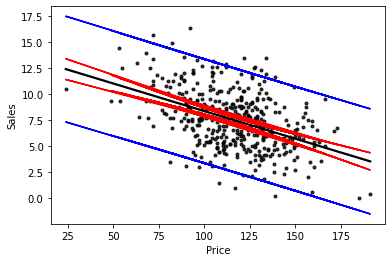

In [ ]:
fig1,ax1 = plt.subplots()
sns.regplot('Price','Sales', data=prodata,
ax=ax1, ci=False, marker='.', color='black')
ax1.plot(prodata['Price'],result['mean_ci_lower'
], color='red')
ax1.plot(prodata['Price'],result['mean_ci_upper'
], color='red')
ax1.plot(prodata['Price'],result['obs_ci_lower']
, color='b')
ax1.plot(prodata['Price'],result['obs_ci_upper']
, color='b')
plt.show()


In [ ]:
prodata.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


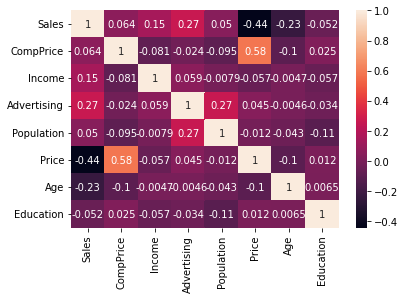

In [ ]:
sns.heatmap(prodata.corr(), annot = True)
plt.show()

In [ ]:
X1 = np.ones(400)
null = sm.OLS(Y, X1).fit()
null.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning:

invalid value encountered in double_scalars



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                nan
Time:                        16:46:58   Log-Likelihood:                -982.35
No. Observations:                 400   AIC:                             1967.
Df Residuals:                     399   BIC:                             1971.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4963      0.141     53.088      0.000       7.219       7.774
==============================================================================
Omnibus:                        2.381   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                2.428
Skew:                           0.185   Prob(JB):                        0.297
Kurtosis:                       2.905   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           7.62e-21
Time:                        16:47:12   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.000      12.398      14.886
Price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X2 = prodata[['Advertising']]
X2 = sm.add_constant(X2)
modelS_Ad = sm.OLS(Y, X2).fit()
modelS_Ad.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     31.17
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           4.38e-08
Time:                        16:47:27   Log-Likelihood:                -967.27
No. Observations:                 400   AIC:                             1939.
Df Residuals:                     398   BIC:                             1947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7370      0.192     35.007      0.000       6.359       7.115
Advertising     0.1144      0.020      5.583      0.000       0.074       0.155
==============================================================================
Omnibus:                        3.396   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                3.137
Skew:                           0.200   Prob(JB):                        0.208
Kurtosis:                       3.167   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X3 = prodata[['Price', 'Advertising']]
X3 = sm.add_constant(X3)
model_mult = sm.OLS(Y, X3).fit()
model_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     77.91
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           2.87e-29
Time:                        16:47:37   Log-Likelihood:                -916.14
No. Observations:                 400   AIC:                             1838.
Df Residuals:                     397   BIC:                             1850.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0034      0.607     21.428      0.000      11.810      14.196
Price          -0.0546      0.005    -10.755      0.000      -0.065      -0.045
Advertising     0.1231      0.018      6.809      0.000       0.088       0.159
==============================================================================
Omnibus:                        1.120   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                1.006
Skew:                           0.121   Prob(JB):                        0.605
Kurtosis:                       3.037   Cond. No.                         599.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(null.rsquared_adj.round(5))
print(model.rsquared_adj.round(5))
print(modelS_Ad.rsquared_adj.round(5))
print(model_mult.rsquared_adj.round(5))

0.0
0.19597
0.0703
0.27824


In [ ]:
print(null.aic.round(5))
print(model.aic.round(5))
print(modelS_Ad.aic.round(5))
print(model_mult.aic.round(5))

1966.70562
1880.45635
1938.54287
1838.27177


In [ ]:
from statsmodels.stats.anova import anova_lm
anova1 = anova_lm(model, model_mult)
anova1

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,398.0,2552.244293,0.0,NaN,NaN,NaN
1,397.0,2285.332743,1.0,266.91155,46.36694,3.639822e-11


In [ ]:
print('Reduction in RSS = ' + str((anova1['ssr'][0] -anova1['ssr'][1])/anova1['ssr'][0]))


Reduction in RSS = 0.10457915441004231


In [ ]:
anova2= anova_lm(modelS_Ad, model_mult)
anova2


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,398.0,2951.133659,0.0,NaN,NaN,NaN
1,397.0,2285.332743,1.0,665.800916,115.660603,7.596365e-24


In [ ]:
print('Reduction in RSS = ' + str((anova2['ssr'][0] - anova2['ssr'][1])/anova2['ssr'][0]))


Reduction in RSS = 0.22560852645992316


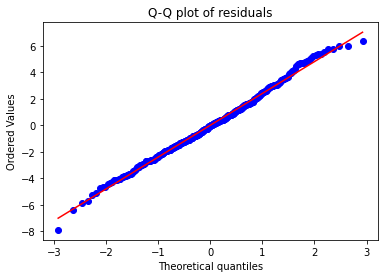

In [ ]:
pred_mult = model_mult.predict(X3)
resid_mult = Y - pred_mult
stats.probplot(resid_mult, dist = "norm", plot=plt)
plt.title('Q-Q plot of residuals')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



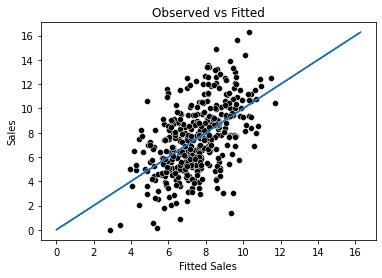

In [ ]:
sns.scatterplot(pred_mult, Y, color = 'black')
plt.xlabel('Fitted Sales')
plt.ylabel('Sales')
plt.plot(Y, Y)
plt.title('Observed vs Fitted')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



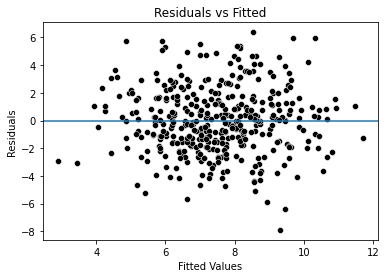

In [ ]:
sns.scatterplot(pred_mult, resid_mult,
color='black')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(0)
plt.title('Residuals vs Fitted')
plt.show()


In [ ]:
data = pd.get_dummies(prodata, drop_first =True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


In [ ]:
Y = data['Sales']
X = data.drop('Sales', axis=1)


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, Y)
rfe = RFE(lm,n_features_to_select=8,verbose=1)
rfe = rfe.fit(X,Y)

Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.


In [ ]:
list(zip(X.columns,rfe.support_,rfe.ranking_))


[('CompPrice', True, 1),
 ('Income', False, 3),
 ('Advertising', True, 1),
 ('Population', False, 4),
 ('Price', True, 1),
 ('Age', True, 1),
 ('Education', False, 2),
 ('ShelveLoc_Good', True, 1),
 ('ShelveLoc_Medium', True, 1),
 ('Urban_Yes', True, 1),
 ('US_Yes', True, 1)]

In [ ]:
X.columns[rfe.support_]

Index(['CompPrice', 'Advertising', 'Price', 'Age', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes'],
      dtype='object')

In [ ]:
X_final = X[X.columns[rfe.support_]]
lmbest = sm.OLS(Y, sm.add_constant(X_final)).fit()
lmbest.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     274.1
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          3.79e-155
Time:                        17:15:00   Log-Likelihood:                -604.71
No. Observations:                 400   AIC:                             1227.
Df Residuals:                     391   BIC:                             1263.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.8353      0.523     13.065      0.000       5.807       7.864
CompPrice            0.0904      0.004     20.135      0.000       0.082       0.099
Advertising          0.1243      0.012     10.806      0.000       0.102       0.147
Price               -0.0957      0.003    -32.919      0.000      -0.101      -0.090
Age                 -0.0465      0.003    -13.434      0.000      -0.053      -0.040
ShelveLoc_Good       4.7870      0.166     28.775      0.000       4.460       5.114
ShelveLoc_Medium     1.8856      0.137     13.786      0.000       1.617       2.155
Urban_Yes            0.1568      0.123      1.278      0.202      -0.084       0.398
US_Yes              -0.0998      0.160     -0.625      0.533      -0.414       0.214
==============================================================================
Omnibus:                        1.653   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                1.734
Skew:                           0.148   Prob(JB):                        0.420
Kurtosis:                       2.870   Cond. No.                     1.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_final = X_final.drop(['US_Yes','Urban_Yes'],axis=1)
lmbest = sm.OLS(Y, sm.add_constant(X_final)).fit()
lmbest.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     365.1
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          2.79e-157
Time:                        17:15:04   Log-Likelihood:                -605.73
No. Observations:                 400   AIC:                             1225.
Df Residuals:                     393   BIC:                             1253.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.8830      0.520     13.236      0.000       5.861       7.905
CompPrice            0.0907      0.004     20.225      0.000       0.082       0.099
Advertising          0.1199      0.008     14.287      0.000       0.103       0.136
Price               -0.0957      0.003    -32.918      0.000      -0.101      -0.090
Age                 -0.0464      0.003    -13.415      0.000      -0.053      -0.040
ShelveLoc_Good       4.7686      0.166     28.761      0.000       4.443       5.095
ShelveLoc_Medium     1.8767      0.136     13.783      0.000       1.609       2.144
==============================================================================
Omnibus:                        1.637   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.728
Skew:                           0.140   Prob(JB):                        0.422
Kurtosis:                       2.842   Cond. No.                     1.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

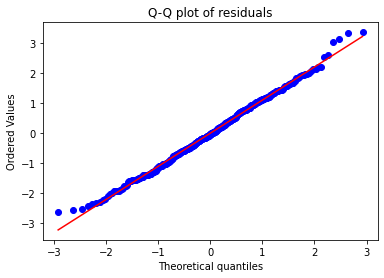

In [ ]:
pred = lmbest.predict()
resid = Y - pred
stats.probplot(resid, dist = "norm", plot=plt)
plt.title('Q-Q plot of residuals')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



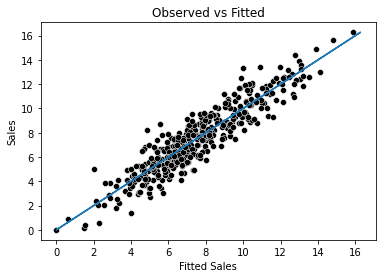

In [ ]:
sns.scatterplot(pred, Y, color = 'black')
plt.xlabel('Fitted Sales')
plt.ylabel('Sales')
plt.plot(Y, Y)
plt.title('Observed vs Fitted')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



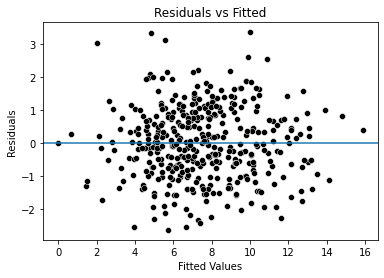

In [ ]:
sns.scatterplot(pred, resid, color='black')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(0)
plt.title('Residuals vs Fitted')
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  
  return(vif)
calc_vif(X_final)


,variables,VIF
0,CompPrice,49.591952
1,Advertising,1.985514
2,Price,38.287601
3,Age,9.771351
4,ShelveLoc_Good,1.877814
5,ShelveLoc_Medium,3.241473


In [ ]:
X_final = X_final.drop('CompPrice', axis = 1)
calc_vif(X_final)


,variables,VIF
0,Advertising,1.982519
1,Price,9.308077
2,Age,8.033559
3,ShelveLoc_Good,1.847710
4,ShelveLoc_Medium,3.149700


In [ ]:
final_model = sm.OLS(Y,sm.add_constant(X_final)).fit()
final_model.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     175.0
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           1.00e-97
Time:                        17:15:28   Log-Likelihood:                -748.40
No. Observations:                 400   AIC:                             1509.
Df Residuals:                     394   BIC:                             1533.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               14.4712      0.514     28.168      0.000      13.461      15.481
Advertising          0.1093      0.012      9.145      0.000       0.086       0.133
Price               -0.0615      0.003    -18.227      0.000      -0.068      -0.055
Age                 -0.0500      0.005    -10.144      0.000      -0.060      -0.040
ShelveLoc_Good       4.8172      0.237     20.365      0.000       4.352       5.282
ShelveLoc_Medium     1.9388      0.194      9.983      0.000       1.557       2.321
==============================================================================
Omnibus:                        0.359   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.835   Jarque-Bera (JB):                0.484
Skew:                           0.020   Prob(JB):                        0.785
Kurtosis:                       2.834   Cond. No.                         847.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           7.62e-21
Time:                        17:17:46   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.000      12.398      14.886
Price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X4 = pd.get_dummies(prodata['ShelveLoc'],drop_first = True)
modelS_Sh = sm.OLS(Y, sm.add_constant(X4)).fit()
modelS_Sh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     92.23
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           1.27e-33
Time:                        17:18:06   Log-Likelihood:                -906.03
No. Observations:                 400   AIC:                             1818.
Df Residuals:                     397   BIC:                             1830.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5229      0.239     23.131      0.000       5.054       5.992
Good           4.6911      0.348     13.464      0.000       4.006       5.376
Medium         1.7837      0.286      6.229      0.000       1.221       2.347
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.092
Skew:                           0.033   Prob(JB):                        0.955
Kurtosis:                       2.966   Cond. No.                         4.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X5 = pd.concat([prodata['Price'],X4],axis=1)
modelS_PSh=sm.OLS(Y, sm.add_constant(X5)).fit()
modelS_PSh.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           6.49e-67
Time:                        17:18:22   Log-Likelihood:                -825.92
No. Observations:                 400   AIC:                             1660.
Df Residuals:                     396   BIC:                             1676.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0018      0.503     23.839      0.000      11.012      12.992
Price         -0.0567      0.004    -13.967      0.000      -0.065      -0.049
Good           4.8958      0.286     17.123      0.000       4.334       5.458
Medium         1.8620      0.235      7.932      0.000       1.401       2.324
==============================================================================
Omnibus:                        1.779   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.651
Skew:                           0.062   Prob(JB):                        0.438
Kurtosis:                       2.711   Cond. No.                         638.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

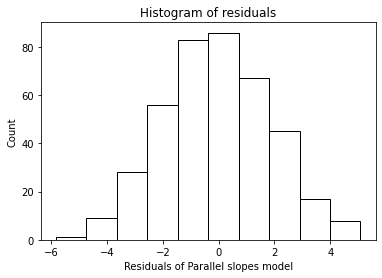

In [ ]:
pred_parallel = modelS_PSh.predict()
resid_parallel = Y - pred_parallel
resid_parallel.hist(color = 'white', edgecolor =
'black', grid = False)
plt.xlabel('Residuals of Parallel slopes model')
plt.ylabel('Count')
plt.title('Histogram of residuals')
plt.show()

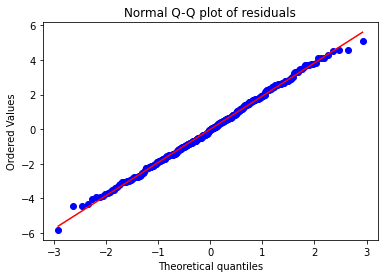

In [ ]:
stats.probplot(resid_parallel, dist="norm",
plot=plt, fit = True)
plt.title('Normal Q-Q plot of residuals')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



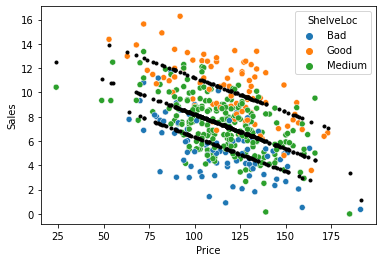

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot('Price','Sales', hue = 'ShelveLoc', data=prodata)
ax.scatter(prodata['Price'],pred_parallel, marker = '.', color = 'black')
plt.show()


In [ ]:
from statsmodels.formula.api import ols
prodata1 = pd.get_dummies(prodata, drop_first =
True)
int_model = ols(formula = 'Sales ~ Price + ShelveLoc_Good+ShelveLoc_Medium+Price:ShelveLoc_Good+Price:ShelveLoc_Medium', data =prodata1).fit()
int_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     94.17
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           4.62e-65
Time:                        17:19:49   Log-Likelihood:                -825.11
No. Observations:                 400   AIC:                             1662.
Df Residuals:                     394   BIC:                             1686.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 11.8330      0.966     12.252      0.000       9.934      13.732
Price                     -0.0552      0.008     -6.672      0.000      -0.071      -0.039
ShelveLoc_Good             6.1359      1.393      4.405      0.000       3.398       8.874
ShelveLoc_Medium           1.6305      1.172      1.392      0.165      -0.673       3.934
Price:ShelveLoc_Good      -0.0106      0.012     -0.900      0.369      -0.034       0.013
Price:ShelveLoc_Medium     0.0020      0.010      0.198      0.843      -0.018       0.022
==============================================================================
Omnibus:                        1.921   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.763
Skew:                           0.067   Prob(JB):                        0.414
Kurtosis:                       2.704   Cond. No.                     2.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""